In [1]:
import csv
import json
import os

# Ensure the 'output' folder exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read the CSV file line by line and process the first 20 rows
with open('opinion-clusters-2023-05-31.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Process the first 20 rows
    for i, row in enumerate(csvreader):
        if i >= 20:
            break
        
        # Assuming each row has one column that contains the JSON string
        json_str = row[0] 
        
        # Parse the JSON string to ensure it's valid and reformat it
        data = json.loads(json_str)
        
        # Save the JSON to a new file in the 'output' folder
        output_file = os.path.join(output_dir, f'row_{i}.json')
        with open(output_file, 'w') as jsonfile:
            json.dump(data, jsonfile, indent=4)

print("First 20 rows extracted successfully!")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [7]:
import pandas as pd
import json
import os

# Ensure the 'output' folder exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Read the first 5 rows of the CSV file
df = pd.read_csv('opinions.csv', nrows=100)

# Convert each row to an individual JSON and save it to the 'output' folder
for index, row in df.iterrows():
    # Convert the row to a dictionary then dump as a JSON string
    row_as_dict = row.to_dict()
    
    # Save the JSON to a new file in the 'output' folder
    output_file = os.path.join(output_dir, f'row_{index}.json')
    with open(output_file, 'w') as jsonfile:
        json.dump(row_as_dict, jsonfile, indent=4)

print("First 5 rows extracted successfully as JSON!")

First 5 rows extracted successfully as JSON!


In [9]:
import pandas as pd
import json
import os

# Ensure the 'output' folder exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define start and end rows
start_row = 40323
end_row = 40400

# Read the specific rows from the CSV file
df = pd.read_csv('opinions.csv', skiprows=range(1, start_row), nrows=end_row-start_row+1)

# Convert each row to an individual JSON and save it to the 'output' folder
for index, row in df.iterrows():
    # Convert the row to a dictionary then dump as a JSON string
    row_as_dict = row.to_dict()
    
    # Save the JSON to a new file in the 'output' folder
    output_file = os.path.join(output_dir, f'row_{index+start_row}.json')
    with open(output_file, 'w') as jsonfile:
        json.dump(row_as_dict, jsonfile, indent=4)

print(f"Rows {start_row} to {end_row} extracted successfully as JSON!")


Rows 40323 to 40400 extracted successfully as JSON!


In [29]:
import pandas as pd
import json
import os
import numpy as np

# Ensure the 'output' folder exists
output_dir = 'chunked'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define start and end rows
start_row = 4035
end_row = 4035

# Read the specific rows from the CSV file
df = pd.read_csv('chunked/chunk_0.csv', skiprows=range(1, start_row), nrows=end_row-start_row+1)

# Convert each row to an individual JSON and save it to the 'output' folder
for _, row in df.iterrows():
    # Convert the row to a dictionary
    row_as_dict = row.to_dict()
    
    # Replace NaN values with the string "NaN"
    for key, value in row_as_dict.items():
        if pd.isna(value):
            row_as_dict[key] = "NaN"

    # Extract the ID and use it as the filename
    file_id = row_as_dict.get('id', 'unknown_id')
    output_file = os.path.join(output_dir, f'{file_id}.json')
    
    # Dump the row data as JSON to the file
    with open(output_file, 'w') as jsonfile:
        json.dump(row_as_dict, jsonfile, indent=4)

print(f"Rows {start_row} to {end_row} extracted successfully as JSON!")


Rows 4035 to 4035 extracted successfully as JSON!


In [12]:
import os

# Define the keys and their possible values
keys = [
    "plain_text",
    "html",
    "html_lawbox",
    "html_columbia",
    "html_anon_2020",
    "xml_harvard",
    "html_with_citations"
]

# Generate all possible combinations of values (NaN and non-NaN)
combinations = ["NaN", "words"]  # Assuming "words" is the non-NaN value

def generate_folders_recursive(current_path, keys_remaining):
    if not keys_remaining:
        return

    current_key = keys_remaining[0]
    new_keys_remaining = keys_remaining[1:]

    for value in combinations:
        new_path = os.path.join(current_path, f"{current_key}_{value}")
        os.makedirs(new_path)
        generate_folders_recursive(new_path, new_keys_remaining)

root_path = "folder_tree"
os.makedirs(root_path)

generate_folders_recursive(root_path, keys)

print("Folder tree generated.")


Folder tree generated.


In [13]:
import os
import itertools

# Define the keys and their possible values
keys = [
    "plain_text",
    "html",
    "html_lawbox",
    "html_columbia",
    "html_anon_2020",
    "xml_harvard",
    "html_with_citations"
]

# Generate all possible combinations of keys with non-NaN values
non_nan_combinations = []
for r in range(1, len(keys) + 1):
    non_nan_combinations.extend(itertools.combinations(keys, r))

# Create folders for each non-NaN combination
root_path = "folder_tree_flat"
os.makedirs(root_path)

for combo in non_nan_combinations:
    folder_name = "*".join(combo)
    folder_path = os.path.join(root_path, folder_name)
    os.makedirs(folder_path)

print("Flat folder tree generated.")


Flat folder tree generated.


In [20]:
import random

n = 10  # Adjust as needed

# Generate n unique random numbers in the range of the CSV rows
random_rows = set()
while len(random_rows) < n:
    random_rows.add(random.randint(0, 9000000))

# Convert set to a sorted list for better performance
random_rows = sorted(list(random_rows))
print(random_rows[:5])  # Let's print the first 10 numbers to verify


[333549, 3675457, 4694090, 5166535, 6580733]


In [23]:
import pandas as pd
import json
import os

# Ensure the 'output' folder exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over the random row numbers and extract the rows
for row_num in random_rows:
    # Read the specific row from the CSV file
    df = pd.read_csv('opinions.csv', skiprows=range(1, row_num), nrows=1)
    
    # Convert the row to a dictionary
    row_as_dict = df.iloc[0].to_dict()
    
    # Replace NaN values with the string "NaN"
    for key, value in row_as_dict.items():
        if pd.isna(value):
            row_as_dict[key] = "NaN"

    # Extract the ID and use it as the filename
    file_id = row_as_dict.get('id', 'unknown_id')
    output_file = os.path.join(output_dir, f'{file_id}.json')
    
    # Dump the row data as JSON to the file
    with open(output_file, 'w') as jsonfile:
        json.dump(row_as_dict, jsonfile, indent=4)

print(f"{n} random rows extracted successfully as JSON!")


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
import pandas as pd
import json
import os

# Ensure the 'output' folder exists
output_dir = 'output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over the random row numbers and extract the rows
for row_num in random_rows:
    # Read the specific row from the CSV file
    df = pd.read_csv('opinions.csv', skiprows=range(1, row_num), nrows=1)
    
    # Convert the row to a dictionary
    row_as_dict = df.iloc[0].to_dict()
    
    # Replace NaN values with the string "NaN"
    for key, value in row_as_dict.items():
        if pd.isna(value):
            row_as_dict[key] = "NaN"

    # Extract the ID and use it as the filename
    file_id = row_as_dict.get('id', 'unknown_id')
    output_file = os.path.join(output_dir, f'{file_id}.json')
    
    # Dump the row data as JSON to the file
    with open(output_file, 'w') as jsonfile:
        json.dump(row_as_dict, jsonfile, indent=4)

print(f"{n} random rows extracted successfully as JSON!")


In [32]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 9.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/v0/cvs3s56j6nnc5wpthwy35v2r0000gn/T/ipykernel_13260/2420105351.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_counts = df_counts.append({"Folder": folder, "File_Count": num_files}, ignore_index=True)
/var/folders/v0/cvs3s56j6nnc5wpthwy35v2r0000gn/T/ipykernel_13260/2420105351.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_counts = df_counts.append({"Folder": folder, "File_Count": num_files}, ignore_index=True)
/var/folders/v0/cvs3s56j6nnc5wpthwy35v2r0000gn/T/ipykernel_13260/2420105351.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_counts = df_counts.append({"Folder": folder, "File_Count": num_files}, ignore_index=True)
/var/folders/v0/cvs3s56j6nnc5wpthwy35v2r0000gn/T/ipykernel_13260/24

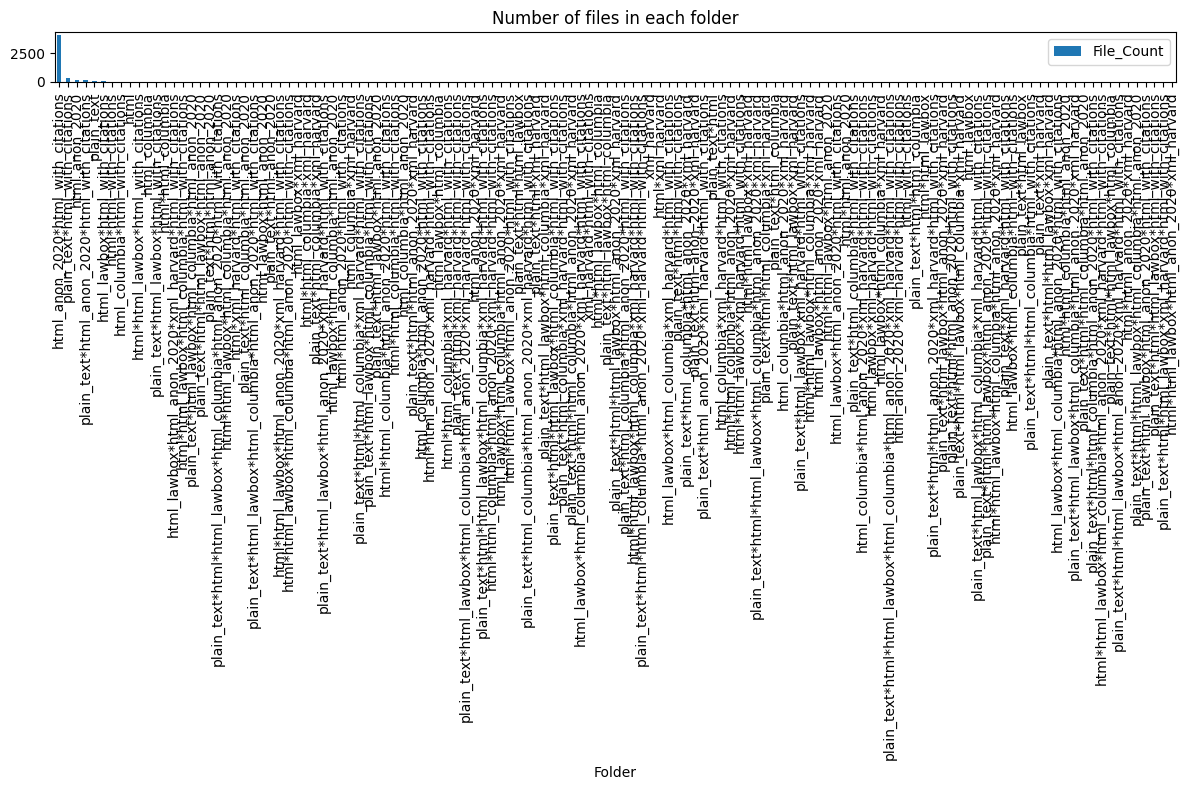

In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt

root_path = "folder_tree_flat"
folders = os.listdir(root_path)  # Get all sub-folders

# Create an empty DataFrame to hold folder names and the count of files within them
df_counts = pd.DataFrame(columns=["Folder", "File_Count"])

# Iterate through the folders and count the files
for folder in folders:
    folder_path = os.path.join(root_path, folder)
    if os.path.isdir(folder_path):  # Check if it's a folder
        num_files = len(os.listdir(folder_path))  # Count the number of files in the folder
        df_counts = df_counts.append({"Folder": folder, "File_Count": num_files}, ignore_index=True)

# Plotting
plt.figure(figsize=(12, 8))
df_counts.sort_values(by="File_Count", ascending=False).plot.bar(x="Folder", y="File_Count", ax=plt.gca())
plt.title("Number of files in each folder")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


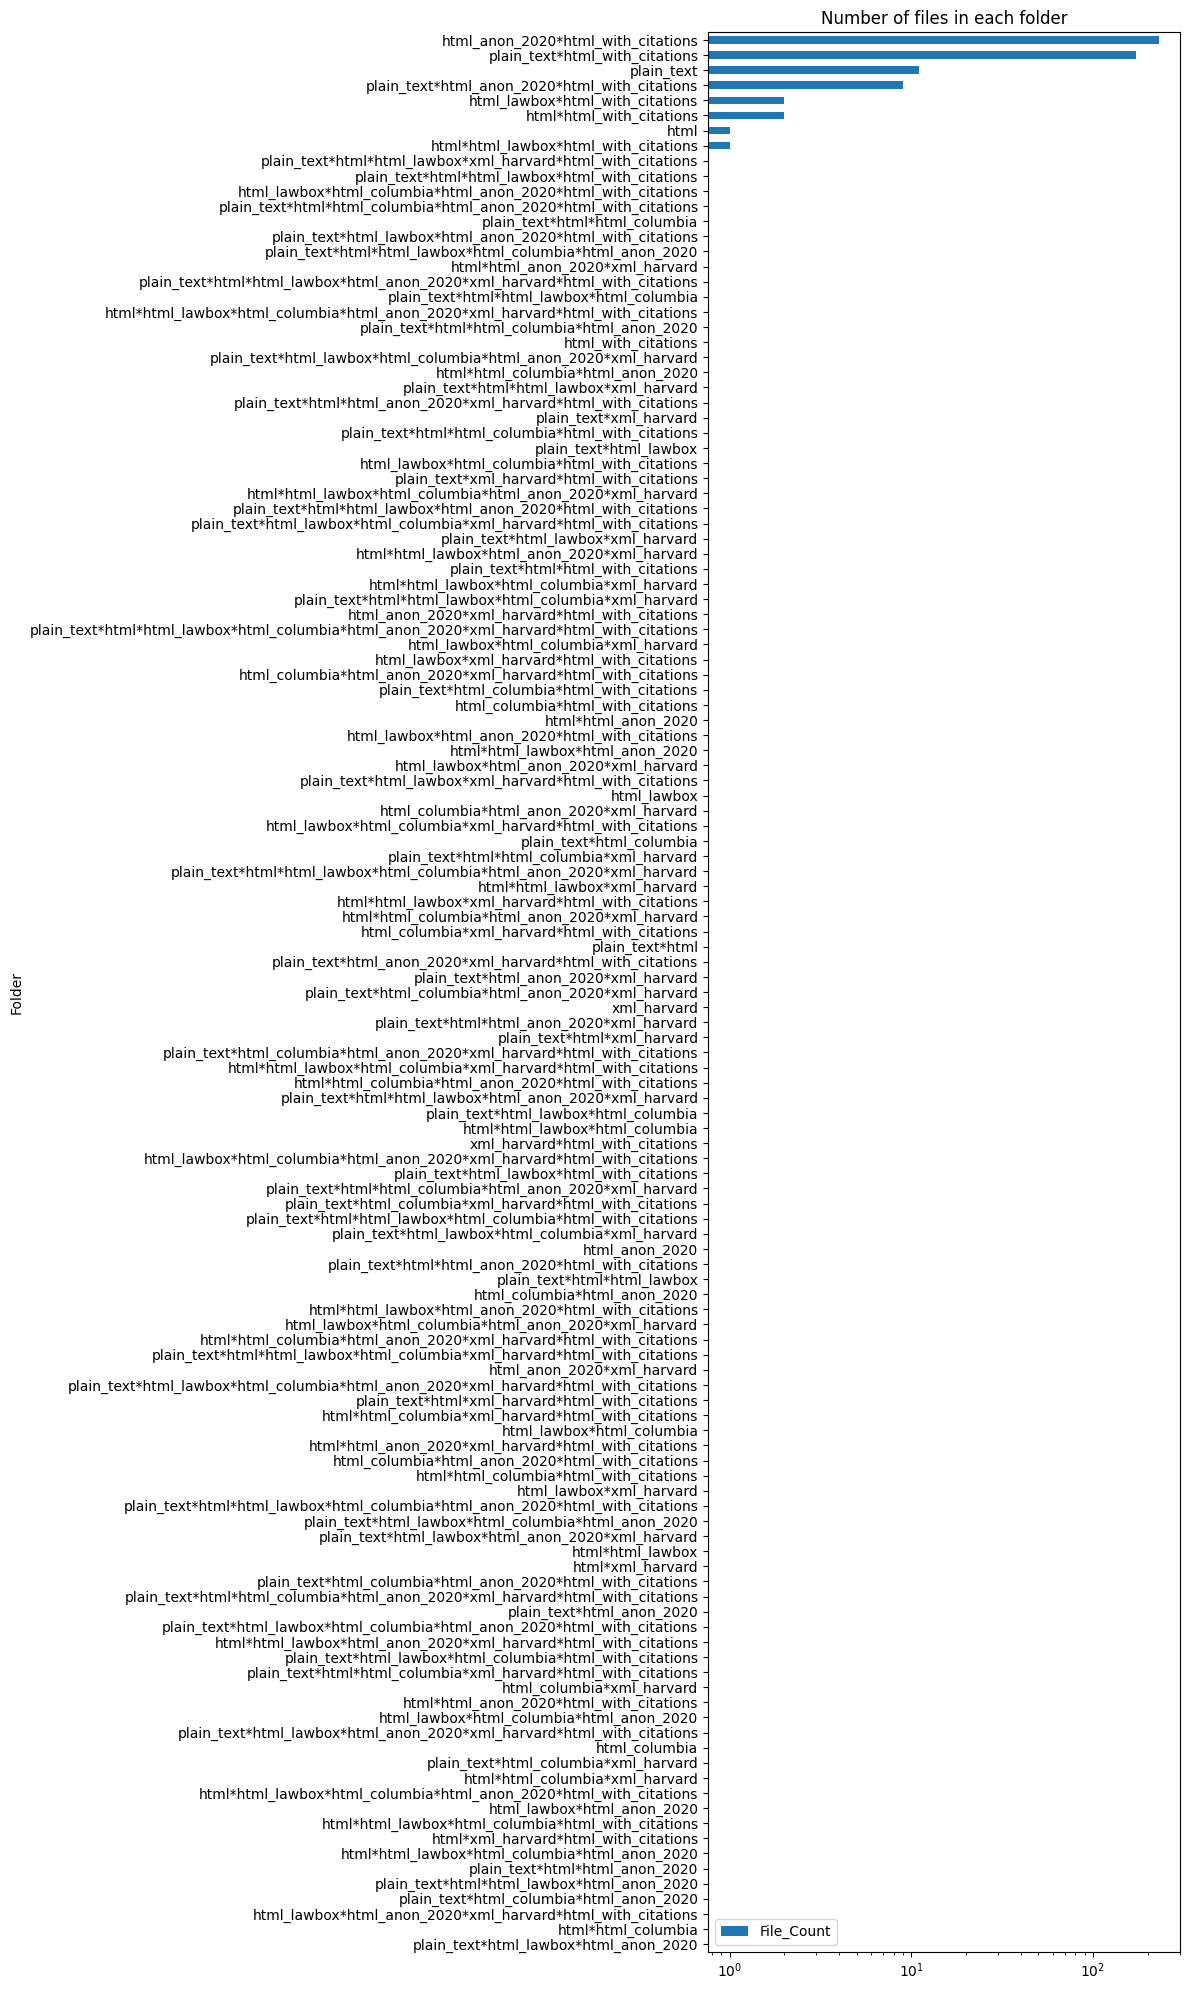

In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt

root_path = "folder_tree_flat"
folders = os.listdir(root_path)  # Get all sub-folders

# List to collect data which will be converted to a DataFrame later
data_list = []

# Iterate through the folders and count the files
for folder in folders:
    folder_path = os.path.join(root_path, folder)
    if os.path.isdir(folder_path):  # Check if it's a folder
        num_files = len(os.listdir(folder_path))  # Count the number of files in the folder
        data_list.append({"Folder": folder, "File_Count": num_files})

# Convert list to DataFrame
df_counts = pd.DataFrame(data_list)

# Plotting
plt.figure(figsize=(12, 20))
ax = df_counts.sort_values(by="File_Count").plot.barh(x="Folder", y="File_Count", ax=plt.gca(), logx=True)
plt.title("Number of files in each folder")
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
import os
import json

# Given a row from the DataFrame, this function returns the folder name based on the non-NaN keys
def get_folder_name(row, keys):
    non_nan_keys = [key for key in keys if row[key] != "NaN"]
    folder_name = "*".join(non_nan_keys)
    return folder_name

# Load a subset of rows from the CSV
start_row = 10000
end_row = 1000000
df = pd.read_csv('opinions.csv', skiprows=range(1, start_row), nrows=end_row-start_row+1)

root_path = "folder_tree_flat"

# Process each row of the DataFrame
for _, row in df.iterrows():
    # Convert NaN values to the string "NaN"
    row_as_dict = row.to_dict()
    for key, value in row_as_dict.items():
        if pd.isna(value):
            row_as_dict[key] = "NaN"

    # Determine the folder where this JSON should be saved
    folder_name = get_folder_name(row_as_dict, keys)
    folder_path = os.path.join(root_path, folder_name)
    
    # Ensure the folder exists (it should, but this is just in case)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Save the row as a JSON in the determined folder
    file_id = row_as_dict.get('id', 'unknown_id')
    output_file = os.path.join(folder_path, f'{file_id}.json')
    
    with open(output_file, 'w') as jsonfile:
        json.dump(row_as_dict, jsonfile, indent=4)

print(f"Rows {start_row} to {end_row} extracted successfully as JSON and sorted into folders!")


/var/folders/v0/cvs3s56j6nnc5wpthwy35v2r0000gn/T/ipykernel_13260/2419369772.py:14: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('opinions.csv', skiprows=range(1, start_row), nrows=end_row-start_row+1)


In [2]:
import os
import pandas as pd
import json

# Given a row from the DataFrame, this function returns the folder name based on the non-NaN keys
def get_folder_name(row, keys):
    non_nan_keys = [key for key in keys if row[key] != "NaN"]
    folder_name = "*".join(non_nan_keys)
    return folder_name

def process_csv_to_folders(csv_path, start_row, end_row):
    # Define the keys
    keys = [
        "plain_text",
        "html",
        "html_lawbox",
        "html_columbia",
        "html_anon_2020",
        "xml_harvard",
        "html_with_citations"
    ]

    # Load a subset of rows from the CSV
    df = pd.read_csv(csv_path, skiprows=range(1, start_row), nrows=end_row-start_row+1)
    
    root_path = "folder_tree_flat"
    
    # Process each row of the DataFrame
    for _, row in df.iterrows():
        # Convert NaN values to the string "NaN"
        row_as_dict = row.to_dict()
        for key, value in row_as_dict.items():
            if pd.isna(value):
                row_as_dict[key] = "NaN"
    
        # Determine the folder where this JSON should be saved
        folder_name = get_folder_name(row_as_dict, keys)
        folder_path = os.path.join(root_path, folder_name)
        
        # Ensure the folder exists (it should, but this is just in case)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
    
        # Save the row as a JSON in the determined folder
        file_id = row_as_dict.get('id', 'unknown_id')
        output_file = os.path.join(folder_path, f'{file_id}.json')
        
        with open(output_file, 'w') as jsonfile:
            json.dump(row_as_dict, jsonfile, indent=4)
    
    print(f"Rows {start_row} to {end_row} extracted successfully as JSON and sorted into folders!")

# Example usage:
# process_csv_to_folders('opinions.csv', 10000, 1000000)


In [1]:
import pandas as pd
import os
import json

# Define the keys to look for non-NaN values
keys = [
    "plain_text",
    "html",
    "html_lawbox",
    "html_columbia",
    "html_anon_2020",
    "xml_harvard",
    "html_with_citations"
]

# Given a row from the DataFrame, this function returns the folder name based on the non-NaN keys
def get_folder_name(row, keys):
    non_nan_keys = [key for key in keys if row[key] != "NaN"]
    if not non_nan_keys:
        return "all_NaN"
    folder_name = "*".join(non_nan_keys)
    return folder_name

def process_csv_to_folders(csv_file, start_row, end_row):
    df = pd.read_csv(csv_file, skiprows=range(1, start_row), nrows=end_row-start_row+1)
    root_path = "folder_tree_flat"
    
    # Process each row of the DataFrame
    for _, row in df.iterrows():
        # Convert NaN values to the string "NaN"
        row_as_dict = row.to_dict()
        for key, value in row_as_dict.items():
            if pd.isna(value):
                row_as_dict[key] = "NaN"

        # Determine the folder where this JSON should be saved
        folder_name = get_folder_name(row_as_dict, keys)
        folder_path = os.path.join(root_path, folder_name)
        
        # Ensure the folder exists (it should, but this is just in case)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

        # Save the row as a JSON in the determined folder
        file_id = row_as_dict.get('id', 'unknown_id')
        output_file = os.path.join(folder_path, f'{file_id}.json')
        
        with open(output_file, 'w') as jsonfile:
            json.dump(row_as_dict, jsonfile, indent=4)

    print(f"Rows {start_row} to {end_row} extracted successfully as JSON and sorted into folders!")

# Example usage:
# process_csv_to_folders('opinions.csv', 10000, 1000000)

In [2]:
process_csv_to_folders('opinions.csv', 2000000, 2005000)

FileNotFoundError: [Errno 2] No such file or directory: 'opinions.csv'

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def plot_file_counts():
    root_path = "folder_tree_flat"
    folders = os.listdir(root_path)  # Get all sub-folders

    # List to collect data which will be converted to a DataFrame later
    data_list = []

    # Iterate through the folders and count the files
    for folder in folders:
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):  # Check if it's a folder
            num_files = len(os.listdir(folder_path))  # Count the number of files in the folder
            data_list.append({"Folder": folder, "File_Count": num_files})

    # Convert list to DataFrame
    df_counts = pd.DataFrame(data_list)

    # Filter out folders with zero files
    df_non_zero = df_counts[df_counts["File_Count"] > 0]

    # Compute the total number of files
    total_files = df_non_zero['File_Count'].sum()

    # Plotting
    plt.figure(figsize=(10, 12))
    ax = df_non_zero.sort_values(by="File_Count").plot.barh(x="Folder", y="File_Count", ax=plt.gca(), logx=True)

    # Annotate each bar with its count
    for i, (index, row) in enumerate(df_non_zero.sort_values(by="File_Count").iterrows()):
        ax.text(row['File_Count'] + 0.2, i, str(row['File_Count']), va='center', ha='left', color='black', fontsize=10)
    
    # Display the total number of files
    plt.text(0.2, i + 2, f'Total Files: {total_files}', fontsize=12, color='blue')

    plt.title("Number of files in each folder (Non-Zero counts)")
    plt.tight_layout()
    plt.show()

plot_file_counts()
